In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sqlite3

# Create a SQL connection to our SQLite database
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

fires = pd.read_sql_query("SELECT * from fires", conn)

In [3]:
sns.set_theme()

In [4]:
# Verify that result of SQL query is stored in the dataframe
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [7]:
# First look into the the df and also information
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [12]:
# Columns selected
fire = fires[['SOURCE_SYSTEM_TYPE', 'FIRE_CODE', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
            'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE']]

In [14]:
#14 columns that will bring relevant information to understand causes of fires across USA
fire.head()

fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   SOURCE_SYSTEM_TYPE  object 
 1   FIRE_CODE           object 
 2   FIRE_NAME           object 
 3   FIRE_YEAR           int64  
 4   DISCOVERY_DATE      float64
 5   DISCOVERY_DOY       int64  
 6   DISCOVERY_TIME      object 
 7   STAT_CAUSE_CODE     float64
 8   STAT_CAUSE_DESCR    object 
 9   FIRE_SIZE           float64
 10  FIRE_SIZE_CLASS     object 
 11  LATITUDE            float64
 12  LONGITUDE           float64
 13  OWNER_DESCR         object 
 14  STATE               object 
dtypes: float64(5), int64(2), object(8)
memory usage: 215.2+ MB


In [16]:
# checking if there is any null value

fire.isna().sum()

SOURCE_SYSTEM_TYPE          0
FIRE_CODE             1555636
FIRE_NAME              957189
FIRE_YEAR                   0
DISCOVERY_DATE              0
DISCOVERY_DOY               0
DISCOVERY_TIME         882638
STAT_CAUSE_CODE             0
STAT_CAUSE_DESCR            0
FIRE_SIZE                   0
FIRE_SIZE_CLASS             0
LATITUDE                    0
LONGITUDE                   0
OWNER_DESCR                 0
STATE                       0
dtype: int64

We have 3 columns with null values

- FIRE_CODE: Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).
- FIRE_NAME: Name of the incident, from the fire report (primary) or ICS-209 report (secondary)
- DISCOVERY_TIME: Time of day that the fire was discovered or confirmed to exist.

Finally FIRE_CODE doesn't seem to be that relevant, neither FIRE_NAME, so we can drop it.
DISCOVERY_TIME has almost half of the lignes empty, so for this analysis we will check date by periods of the year/months/days.

In [22]:
fire.DISCOVERY_TIME.isna().value_counts()

False    997827
True     882638
Name: DISCOVERY_TIME, dtype: int64

In [24]:
fire.drop(['DISCOVERY_TIME', 'FIRE_CODE', 'FIRE_NAME'], axis=1, inplace=True)

C:\Users\paulo\AppData\Local\Temp/ipykernel_3284/2939898264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire.drop(['DISCOVERY_TIME', 'FIRE_CODE', 'FIRE_NAME'], axis=1, inplace=True)


In [28]:
#replace the name of DISCOVERY_DOY to DISCOVERY_DAY

fire.rename(columns={"DISCOVERY_DOY": "DISCOVERY_DAY"}, inplace=True)

C:\Users\paulo\AppData\Local\Temp/ipykernel_3284/1548130454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire.rename(columns={"DISCOVERY_DOY": "DISCOVERY_DAY"}, inplace=True)


In [29]:
fire.head()

,SOURCE_SYSTEM_TYPE,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DAY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE
0,FED,2005,2453403.5,33,9.0,Miscellaneous,0.10,A,40.036944,-121.005833,USFS,CA
1,FED,2004,2453137.5,133,1.0,Lightning,0.25,A,38.933056,-120.404444,USFS,CA
2,FED,2004,2453156.5,152,5.0,Debris Burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA
3,FED,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.913333,USFS,CA
4,FED,2004,2453184.5,180,1.0,Lightning,0.10,A,38.559167,-119.933056,USFS,CA


In [31]:
fire.FIRE_YEAR.value_counts().shape

(24,)

In [53]:
fire.FIRE_SIZE_CLASS.value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

In [33]:
fire.STAT_CAUSE_DESCR.value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

#### Exploratory Analysis

Text(0.5, 1.0, 'Distribution of fires from 1992 to 2015')

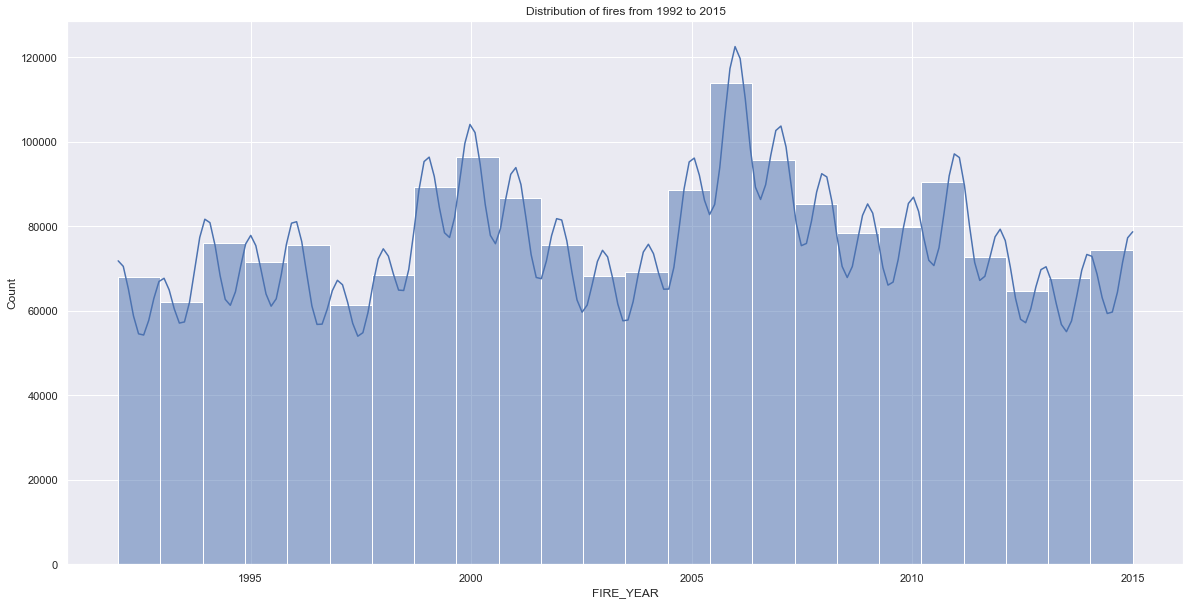

In [62]:
# Checking the distribution of fires from 1992 to 2015

plt.figure(figsize = (20, 10))
sns.histplot(fire['FIRE_YEAR'], bins=24, kde=True);
plt.title('Distribution of fires from 1992 to 2015')

Text(0.5, 1.0, 'Reasons of fires from 1992 to 2015')

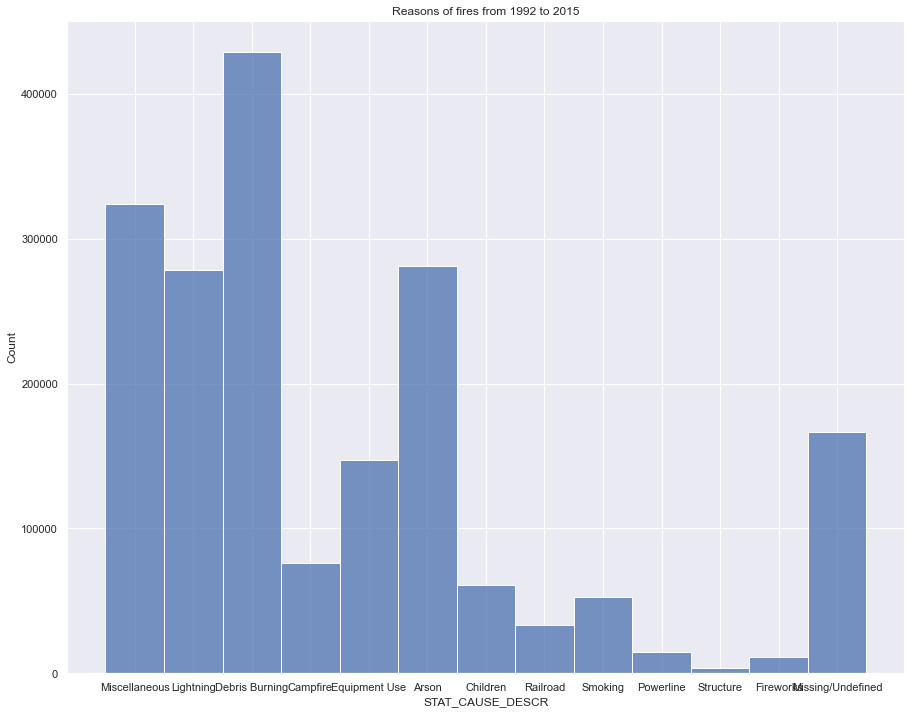

In [63]:
# Checking the main reasons of fires from 1992 to 2015

sns.set(rc={"figure.figsize":(15, 12)})
sns.histplot(x='STAT_CAUSE_DESCR', legend=True, data=fire);
plt.title('Reasons of fires from 1992 to 2015')

Text(0.5, 1.0, 'Distribution of Fire Size Class')

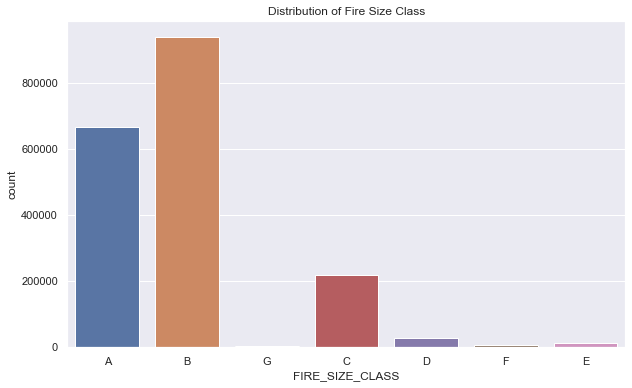

In [67]:
# Checking the distributionof fire size Class

sns.set(rc={"figure.figsize":(10, 6)})
sns.countplot(x='FIRE_SIZE_CLASS', data=fire,  orient='v');
plt.title('Distribution of Fire Size Class')

Text(0.5, 1.0, 'Distribution of sizes among the causes of fires')

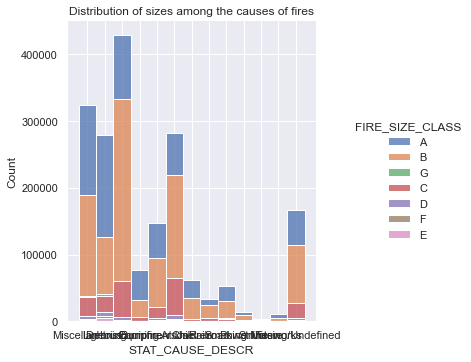

In [72]:
# How is the distribution of sizes among the causes of fires? en utilisant displot

sns.set(rc={"figure.figsize":(18, 15)})
sns.displot(x='STAT_CAUSE_DESCR', hue='FIRE_SIZE_CLASS', multiple='stack', data=fire);
plt.title('Distribution of sizes among the causes of fires')

Text(0.5, 1.0, 'Distribution of sizes among the causes of fires')

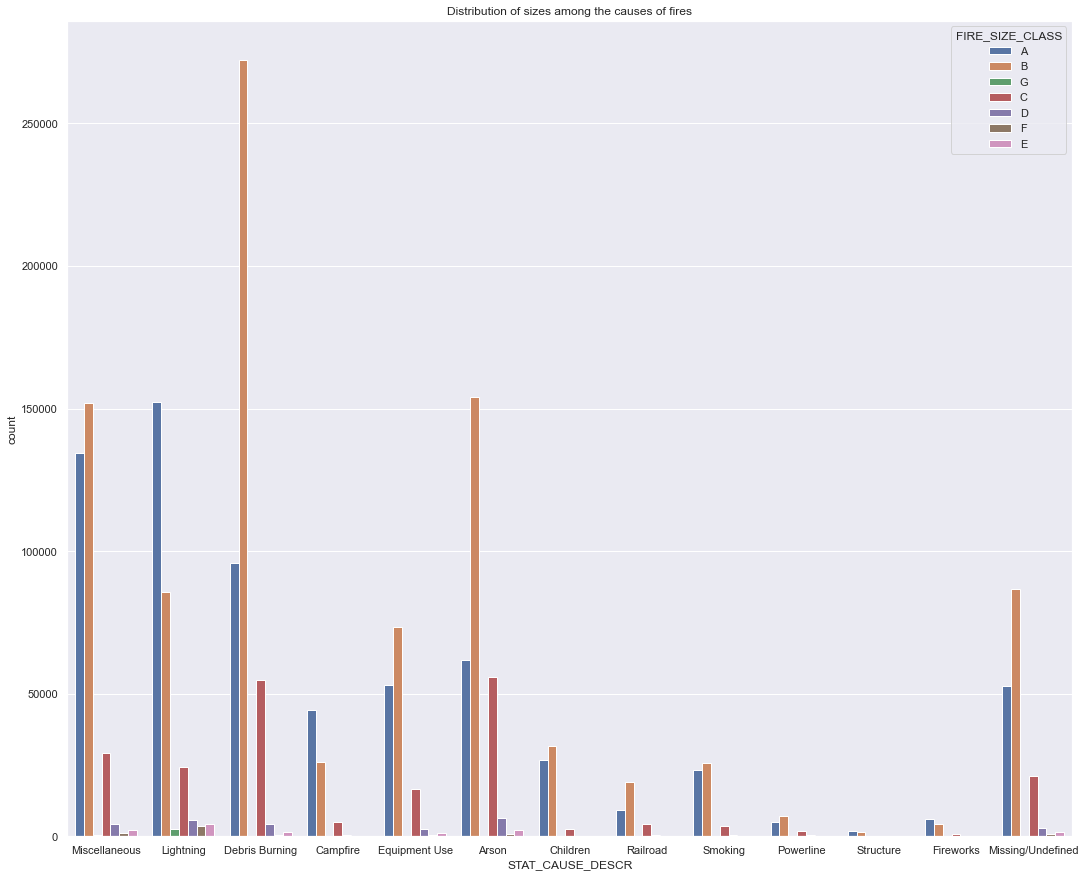

In [73]:
# How is the distribution of sizes among the causes of fires? en utilisant countplot

sns.set(rc={"figure.figsize":(18, 15)})
sns.countplot(x='STAT_CAUSE_DESCR', hue='FIRE_SIZE_CLASS', data=fire);
plt.title('Distribution of sizes among the causes of fires')